In [1]:
import os
import os.path
from utils.video_processing import get_video_fps, save_video, rotate_video
from ultralytics import YOLO
os.environ['YOLO_VERBOSE'] = 'False' # Set YOLO to quiet mode
from utils.visualization import vis_video, show_crops
from collections import defaultdict
import PIL
import numpy as np
import cv2
import copy
import imageio


def do_video_tracking(video_path:str, model, save_dir:str="", stream:bool=False, save_method:str="imageio"):
    fps_v = get_video_fps(video_path)
    video_path = rotate_video(video_path)
    results = model.track(
        video_path,
        show=False,
        tracker="./bytetrack.yaml",
        classes=[0], # only output person class
        conf=0.5, # 0.25 #########################################
        verbose=False,
        persist=True,
        stream=stream,
    )
    if save_dir!="":
        annotated_frames = []
        for result in results:
            # print(result)
            if not result.boxes.is_track:
                annotated_frames.append(result.plot(boxes=False, labels=False))
            else:
                annotated_frames.append(result.plot())
        save_path = save_dir + f"/{os.path.basename(video_path)[:-4]}_tracked.mp4"
        save_video(annotated_frames, save_path, fps=fps_v, method=save_method, bgr=(save_method != "cv2"))
    return results, save_path

def list_subdirs(start_path="."):
    subdir_list = []
    for root, dirs, files in os.walk(start_path):
        for dir in dirs:
            subdir_list.append(os.path.join(root, dir))
    return subdir_list

/home/dingjie/miniconda3/envs/solider/lib/python3.10/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


In [2]:
# #### youren_camera_0313 --------------------------------------
# print(">> Reading all videos: ")
# video_extensions = ["MP4", "mp4"]
# video_dir = "../../data/youren_camera_0313"
# video_list = [fn for fn in os.listdir(video_dir) if any(fn.endswith(ext) for ext in video_extensions)]
# video_list.sort()
# num_videos = len(video_list)
# print("Number of videos: ", num_videos)
# # import pprint
# # pprint.pprint(video_list)



#### office_0325 ---------------------------------------------
print(">> Reading all videos: ")
video_extensions = ["MOV"]
video_dir = "../../data/office_0325"
video_list = [fn for fn in os.listdir(video_dir) if any(fn.endswith(ext) for ext in video_extensions)]
video_list.sort()
num_videos = len(video_list)
print("Number of videos: ", num_videos)
# import pprint
# pprint.pprint(video_list)



# #### office_0327 ---------------------------------------------
# print(">> Reading all videos: ")
# video_extensions = ["MOV"]
# video_dir = "../../data/office_0327"
# video_list = [fn for fn in os.listdir(video_dir) if any(fn.endswith(ext) for ext in video_extensions)]
# video_list.sort()
# num_videos = len(video_list)
# print("Number of videos: ", num_videos)
# # import pprint
# # pprint.pprint(video_list)

>> Reading all videos: 
Number of videos:  3


In [3]:
print(">> Doing video tracking: ")
from tqdm import tqdm
model = YOLO("yolo11x.pt")
video_save_dir = "./output"
video_tracked_path_list = []
video_tracked_result_list = []
# num_videos = 1
for v in tqdm(range(num_videos)):
    this_video_path = os.path.join(video_dir, video_list[v])
    # print("Processing video: ", this_video_path)
    results, save_path = do_video_tracking(this_video_path, model, save_dir=video_save_dir, stream=False, save_method="imageio")
    # tracklet_boxes = [trk for trk in results if trk.boxes.is_track]
    video_tracked_path_list.append(save_path)
    video_tracked_result_list.append(results)
    # print(tracklet_boxes)
# print(results)

>> Doing video tracking: 


  0%|          | 0/3 [00:00<?, ?it/s]


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs



IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1920, 1080) to (1920, 1088) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
 33%|███▎      | 1/3 [01:48<03:36, 108.30s/it]


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs



IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1920, 1080) to (1920, 1088) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
 67%|██████▋   | 2/3 [03:05<01:30, 90.29s/it] 


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs



IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1920, 1080) to (1920, 1088) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
100%|██████████| 3/3 [04:22<00:00, 87.34s/it]


In [4]:
# print(video_tracked_result_list[0])
print("Number of total videos: ", len(video_tracked_result_list))
for v in range(len(video_tracked_result_list)):
    video_id = v
    tracked_frames = [res for res in video_tracked_result_list[video_id] if res.boxes.is_track]
    all_frames = [res for res in video_tracked_result_list[video_id]]
    print("Video", v, "has tracked frames: ", len(tracked_frames), " / ", len(all_frames))

Number of total videos:  3
Video 0 has tracked frames:  776  /  1454
Video 1 has tracked frames:  769  /  1152
Video 2 has tracked frames:  1066  /  1166


In [18]:
from os import listdir
from os.path import join
import time
from deepface.modules.detection import detect_faces
from deepface.DeepFace import represent

img_dir = "/local4TB/projects/dingjie/SOLIDER/VIDEO-REID/output/reid_CUSTOM_VIDEO/query"
img_list = listdir(img_dir)
num_img = len(img_list)
print("The number of images are: ", num_img)

img_list = img_list[5:200]
for img in img_list:
    
    test_img = cv2.imread(join(img_dir, img))
    print(test_img)
    result = detect_faces("opencv",test_img)
    # print(result)

    if result!=[]:
        # print(result)
        # cv2.putText(test_img, "Face", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 3)
        print(result[0].facial_area)
        print(result[0].facial_area.x, result[0].facial_area.y, result[0].facial_area.w, result[0].facial_area.h, result[0].confidence)
        x = result[0].facial_area.x
        y = result[0].facial_area.y
        w = result[0].facial_area.w
        h = result[0].facial_area.h
        cv2.rectangle(test_img, (x,y), (x+w,y+h), color=(0, 255, 0), thickness=int(2))

        face_embedding = represent(result[0].img, model_name="Facenet", enforce_detection=False)
        print(len(face_embedding[0]["embedding"]), face_embedding)

        # cv2.imwrite(f"./face_detection.jpg", test_img) 
        # time.sleep(1)
    else:
        cv2.putText(test_img, "None", (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)

    cv2.imwrite(f"./face_detection.jpg", test_img) 
    # time.sleep(1)

The number of images are:  1907
[[[186 195 199]
  [153 162 166]
  [145 154 158]
  ...
  [162 173 181]
  [162 173 181]
  [162 173 181]]

 [[186 195 199]
  [152 161 165]
  [148 157 161]
  ...
  [162 173 181]
  [162 173 181]
  [162 173 181]]

 [[182 191 195]
  [149 158 162]
  [150 159 163]
  ...
  [161 172 180]
  [162 173 181]
  [162 173 181]]

 ...

 [[105 107 115]
  [105 107 115]
  [104 106 114]
  ...
  [141 144 149]
  [141 144 149]
  [141 144 149]]

 [[104 106 114]
  [104 106 114]
  [103 105 113]
  ...
  [133 136 141]
  [134 137 142]
  [134 137 142]]

 [[104 106 114]
  [105 107 115]
  [104 106 114]
  ...
  [127 130 135]
  [128 131 136]
  [128 131 136]]]
[[[223 231 231]
  [221 229 229]
  [218 226 226]
  ...
  [140 143 148]
  [142 145 150]
  [143 146 151]]

 [[223 231 231]
  [221 229 229]
  [219 227 227]
  ...
  [140 143 148]
  [141 144 149]
  [142 145 150]]

 [[223 231 231]
  [221 229 229]
  [218 226 226]
  ...
  [140 143 148]
  [140 143 148]
  [141 144 149]]

 ...

 [[118 121 126]
  [1

[[[ 95 107 117]
  [ 93 105 115]
  [ 95 107 117]
  ...
  [ 96 108 118]
  [ 96 108 118]
  [ 98 110 120]]

 [[ 96 108 118]
  [ 94 106 116]
  [ 96 108 118]
  ...
  [101 113 123]
  [102 114 124]
  [100 112 122]]

 [[ 95 107 119]
  [ 95 107 119]
  [ 99 111 121]
  ...
  [106 118 128]
  [111 123 133]
  [108 120 130]]

 ...

 [[ 70  69  78]
  [ 69  68  77]
  [ 68  67  76]
  ...
  [ 62  72  79]
  [ 62  72  79]
  [ 61  71  78]]

 [[ 85  88  93]
  [ 85  88  93]
  [ 85  88  93]
  ...
  [ 57  67  74]
  [ 56  66  73]
  [ 56  66  73]]

 [[ 84  87  92]
  [ 85  88  93]
  [ 87  90  95]
  ...
  [ 50  60  67]
  [ 50  60  67]
  [ 51  61  68]]]
[[[212 221 224]
  [199 208 211]
  [182 191 195]
  ...
  [159 171 181]
  [159 171 181]
  [159 172 180]]

 [[210 219 222]
  [198 207 210]
  [182 191 195]
  ...
  [159 171 181]
  [159 171 181]
  [159 172 180]]

 [[208 217 220]
  [198 207 210]
  [182 191 195]
  ...
  [159 171 181]
  [159 171 181]
  [159 172 180]]

 ...

 [[101 107 112]
  [ 97 103 108]
  [103 110 113]
  ..

In [7]:
print(">> Saving video tracklets: ")
tracklet_crops = []
min_trk_length = 2
import torch
# kp_model = YOLO("yolo11x-pose.pt")  # load an official model
kp_model = YOLO("yolo11n-pose.pt")  # load an official model
for video_id in range(len(video_tracked_result_list)):
# for video_id in range(1):    
    tracklet_person_crops = defaultdict(list)
    tracked_frames = [res for res in video_tracked_result_list[video_id] if res.boxes.is_track]
    # print("video_id: ", video_id)
    for res in tracked_frames:
        frame = res.orig_img
        # print(frame.shape)
        # frame  = cv2.cvtColor(res.orig_img, cv2.COLOR_BGR2RGB)
        box_id = res.boxes.id
        for idx, val in enumerate(box_id):
            x1, y1, x2, y2 = map(int, res.boxes.xyxy[idx])
            person_crop = frame[y1:y2, x1:x2]
            # pose estimation -----------------------------------
            results = kp_model(person_crop)   # predict on an image
            kpts = results[0].keypoints.data  # x, y, visibility (if available
            if kpts.shape[0]==1 and kpts[0][0:5,2].nelement()!=0: # only one person detected and head points (nose,eyes,ears) are visible
                print(kpts[0][0:5,2])
                # if  kpts[0][1,2] > 0.5 and kpts[0][2,2] > 0.5 and kpts[0][3,2] > 0.5 and kpts[0][4,2] > 0.5:    # left-eye (1) / right-eye (2) / left-ear (3) / right-ear (4) are visible
                if  kpts[0][1,2] > 0.5 and kpts[0][2,2] > 0.5:    # left-eye (1) and right-eye (2) are visible    
                    tracklet_person_crops[int(val)].append(person_crop)
            else:
                pass
            ######################
            # tracklet_person_crops[int(val)].append(person_crop) 
    # clear too short tracks
    for track_id, person_crops in tracklet_person_crops.items():
        if len(person_crops) < min_trk_length:
            tracklet_person_crops[int(track_id)] = []
    tracklet_crops.append(tracklet_person_crops)

# save as images
save_dir    = "./output/reid_CUSTOM_VIDEO"
train_dir   = os.path.join(save_dir, 'bounding_box_train')
query_dir   = os.path.join(save_dir, 'query')
gallery_dir = os.path.join(save_dir, 'bounding_box_test')
# clear data generated from the previous round
import shutil
if os.path.exists(save_dir):
    print("REMOVE old reid_CUSTOM_VIDEO ----")
    shutil.rmtree(save_dir)
os.makedirs(save_dir)
os.makedirs(train_dir)
os.makedirs(query_dir)
os.makedirs(gallery_dir) 

for video_id, tracklet_person_crops in enumerate(tracklet_crops):
    for track_id, person_crops in tracklet_person_crops.items():
        print(f"Video {video_id}, Track {track_id} has {len(person_crops)} person crops")
        for idx, crop in enumerate(person_crops):
            cv2.imwrite(query_dir + f"/{track_id:04d}_c1_{idx:05d}.jpg", crop)   

>> Saving video tracklets: 

0: 640x512 (no detections), 32.8ms
Speed: 2.4ms preprocess, 32.8ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 512)

0: 640x512 (no detections), 29.3ms
Speed: 2.0ms preprocess, 29.3ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 512)



0: 640x512 (no detections), 27.6ms
Speed: 2.0ms preprocess, 27.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 512)

0: 640x512 (no detections), 27.6ms
Speed: 2.0ms preprocess, 27.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 512)

0: 640x544 (no detections), 26.2ms
Speed: 2.1ms preprocess, 26.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 544)

0: 640x544 (no detections), 20.0ms
Speed: 1.8ms preprocess, 20.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 544)

0: 640x544 (no detections), 19.2ms
Speed: 1.9ms preprocess, 19.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 544)

0: 640x544 (no detections), 19.0ms
Speed: 1.7ms preprocess, 19.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 544)

0: 640x544 1 person, 18.9ms
Speed: 1.9ms preprocess, 18.9ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 544)
tensor([0.3443, 0.2653, 0.0893, 0.6436, 0.2419], device='cuda:0')

0: 640x544

In [9]:
#############################################################
# RUN SOLIDER REID MODEL using DeepFace feature -------------
#############################################################
# /local4TB/projects/dingjie/SOLIDER/SOLIDER-REID/streamed_test.py >>> enable do_streamed_inference_faces @ line 62
 
import subprocess
command = "sh runtest.sh"
working_directory = "../SOLIDER-REID"
p = subprocess.Popen(command, cwd=working_directory, shell=True)
p.wait()

/home/dingjie/miniconda3/envs/solider/lib/python3.10/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
E0000 00:00:1744949819.891315 1757097 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744949819.896799 1757097 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1744949819.911088 1757097 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744949819.911103 1757097 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1744949819.911105 1757097 computation_placer.cc:177] comput

2025-04-17 21:17:02 transreid INFO: Namespace(config_file='configs/reid_CUSTOM_VIDEO/swin_base.yml', opts=['TEST.WEIGHT', './swin_base_msmt17.pth', 'TEST.RE_RANKING', 'False', 'MODEL.SEMANTIC_WEIGHT', '0.2'])
2025-04-17 21:17:02 transreid INFO: Loaded configuration file configs/reid_CUSTOM_VIDEO/swin_base.yml
2025-04-17 21:17:02 transreid INFO: 
MODEL:
  PRETRAIN_HW_RATIO: 2
  METRIC_LOSS_TYPE: 'triplet'
  IF_LABELSMOOTH: 'off'
  IF_WITH_CENTER: 'no'
  NAME: 'transformer'
  NO_MARGIN: True
  DEVICE_ID: ('0')
  TRANSFORMER_TYPE: 'swin_base_patch4_window7_224'
  STRIDE_SIZE: [16, 16]

INPUT:
  SIZE_TRAIN: [384, 128]
  SIZE_TEST: [384, 200]
  PROB: 0.5 # random horizontal flip
  RE_PROB: 0.5 # random erasing
  PADDING: 10
  PIXEL_MEAN: [0.5, 0.5, 0.5]
  PIXEL_STD: [0.5, 0.5, 0.5]

DATASETS:
  NAMES: ('reid_CUSTOM_VIDEO')
  ROOT_DIR: ('../VIDEO-REID/output')

DATALOADER:
  SAMPLER: 'softmax_triplet'
  NUM_INSTANCE: 4
  NUM_WORKERS: 8

SOLVER:
  OPTIMIZER_NAME: 'SGD'
  MAX_EPOCHS: 120
  BAS

W0000 00:00:1744949826.445285 1757097 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Statistic of tracklets before Face DET -------------
Track ID:  [ 1  3  4  5  6  7  9 11 12 13]
Frame #:   [259 147 180 140   4 148  68 501 326 452]
img_pid_list  :  415
img_feat_list :  415
img_camid_list:  415
img_path_list :  415
Num of tracklets:  9
Statistic of tracklets afte Face DET-------------
Track ID:  [ 1  3  4  5  7  9 11 12 13]
Frame #:   [ 12  32   4  95 103   1  76   7  85] 


Tracklet's PID:  1 !----------------------------------------
Tracklet  1 !----------------------------------------
Tracklet's PID:  3 !----------------------------------------
 G/Q Clustering Result: 
 [0 1] [5 5]
 G/- Clustering Result: 
 [0] [5]
 -/Q Clustering Result: 
 [1] [5]
  DO APPEND ---
 >> Length of gallery_feat_list 2
Tracklet  2 !----------------------------------------
Tracklet's PID:  4 !----------------------------------------
 G/Q Clustering Result: 
 [0 1 2] [6 5 3]
 G/- Clustering Result: 
 [0 1] [5 5]
 -/Q Clustering Result: 
 [0 2] [1 3]
  DO APPEND ---
 >> Length of gallery_f

0

Num Images:  248


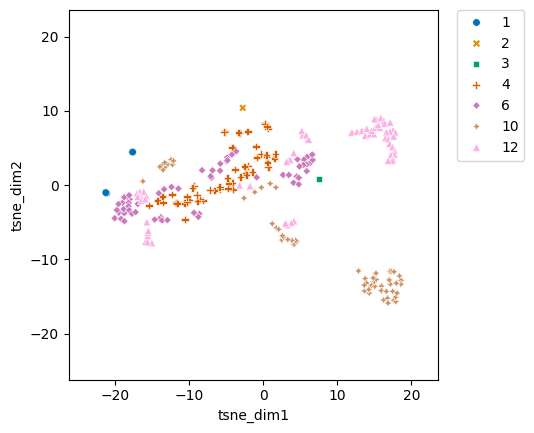

In [31]:
#############################################################
# VISUALIZING t-SNE @ 2D ------------------------------------
#############################################################
import numpy as np
import torch
from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# loading eval results ---------------
X = np.load("../SOLIDER-REID/vis/feat_array.npy") # do_streamed_inference from SOLIDER-REID/processor/processor.py
Y = np.load("../SOLIDER-REID/vis/pid_array.npy")
C = np.load("../SOLIDER-REID/vis/cid_array.npy")
f = open("../SOLIDER-REID/vis/path_list.txt", 'r')
img_path_list = f.readlines()
f.close()
print("Num Images: ", len(img_path_list))
num_img, num_dim = X.shape
assert len(img_path_list)==num_img

max_img = 4000
X = X[:max_img, :]
Y = Y[:max_img]

# Pid visualization --------------------------------------------------------------------------------
n_components = 2  # To get TSNE embedding with 2 dimensions
tsne = TSNE(n_components)
tsne_result = tsne.fit_transform(X)
tsne_result.shape
# Plot the result of our TSNE with the label color coded
tsne_result_df = pd.DataFrame({"tsne_dim1": tsne_result[:,0], "tsne_dim2": tsne_result[:,1], "label": Y})
fig, ax = plt.subplots(1)
sns.scatterplot(x="tsne_dim1", y="tsne_dim2", hue="label", palette="colorblind", style="label", data=tsne_result_df, ax=ax, s=30)
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect("equal")
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.savefig("../SOLIDER-REID/vis/V1_data_pid", facecolor='w', bbox_inches="tight", pad_inches=0.1, transparent=True, dpi=500)


In [ ]:
#############################################################
# VISUALIZING t-SNE @ 3D ------------------------------------
#############################################################
# python vis_ReID_tsne_plotly.py
import os
os.system('python ./vis_ReID_tsne_plotly.py')

In [ ]:
# print("ReID step: ")

video_id = 20
# show_crops([PIL.Image.fromarray(crop) for crop in video_person_crops[video_id]])
vis_video(video_tracked_path_list[video_id])

# vis_video("/local4TB/projects/dingjie/SOLIDER/VIDEO-REID/output/IMG_2224_tracked.mp4")
# vis_video("/local4TB/projects/dingjie/SOLIDER/VIDEO-REID/output/video-5644629437915922182_tracked.mp4")





In [ ]:
import cv2  
from ultralytics import YOLO # Import Ultralytics Package
import threading # Threading module import To facilitate multi-streaming

# Target Function for Thread
def run_tracker_in_thread(filename, model, file_index):
    """
    This function is designed to run a video file or webcam stream
    concurrently with the YOLOv8 model, utilizing threading.
    - filename: The path to the video file or the webcam/external camera source.
    - model: The file path to the YOLOv8 model.
    - file_index: An argument to specify the count of the file being processed.
    """
    video = cv2.VideoCapture(filename)  # Read the video file
    while True:
        ret, frame = video.read()  # Read the video frames
        # Exit the loop if no more frames in either video
        if not ret:
            break
        # Track objects in frames if available
        results = model.track(frame, persist=True)
        res_plotted = results[0].plot()
        cv2.imshow("Tracking_Stream_"+str(file_index), res_plotted)
        key = cv2.waitKey(1)
        if key == ord('q'):
            break
    # Release video sources
    video.release()

In [6]:
print(">> Saving video per tracklet: ") # for DEMO
tracklet_frames = []
for video_id in range(len(video_tracked_result_list)):
    tracklet_inlay_frames = defaultdict(list)
    tracked_frames = [res for res in video_tracked_result_list[video_id] if res.boxes.is_track]
    # print("video_id: ", video_id)
    for res in tracked_frames:
        color_frame = cv2.cvtColor(res.orig_img, cv2.COLOR_BGR2RGB)
        gray_frame  = (np.dstack((color_frame[:,:,1], color_frame[:,:,1], color_frame[:,:,1]))*0.3).astype("uint8")
        # print(gray_frame)
        box_id = res.boxes.id
        for idx, val in enumerate(box_id):
            inlay_frames = copy.deepcopy(gray_frame)
            x1, y1, x2, y2 = map(int, res.boxes.xyxy[idx])
            inlay_frames[y1:y2, x1:x2] = color_frame[y1:y2, x1:x2]
            tracklet_inlay_frames[int(val)].append(inlay_frames)
    # clear too short tracks
    for track_id, inlay_frames in tracklet_inlay_frames.items():
        if len(inlay_frames) < min_trk_length:
            tracklet_inlay_frames[int(track_id)] = []
    tracklet_frames.append(tracklet_inlay_frames)

# save as videos
save_dir    = "./output/reid_CUSTOM_VIDEO"
for video_id, tracklet_inlay_frames in enumerate(tracklet_frames):
    for track_id, inlay_frames in tracklet_inlay_frames.items():
        print(f"Video {video_id}, Track {track_id} has {len(inlay_frames)} frames")
        writer = imageio.get_writer(os.path.join(save_dir, "tracklet_" + str(track_id).zfill(3) + "_inlay_frames.mp4"),fps=30,codec="libx264",quality=3)
        for idx, frame in enumerate(inlay_frames):
            writer.append_data(frame)
        writer.close() 

>> Saving video per tracklet: 


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1920, 1080) to (1920, 1088) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Video 0, Track 1 has 375 frames


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1920, 1080) to (1920, 1088) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Video 0, Track 3 has 348 frames


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1920, 1080) to (1920, 1088) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Video 0, Track 4 has 388 frames


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1920, 1080) to (1920, 1088) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Video 1, Track 5 has 341 frames


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1920, 1080) to (1920, 1088) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Video 1, Track 6 has 262 frames


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1920, 1080) to (1920, 1088) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Video 1, Track 7 has 417 frames


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1920, 1080) to (1920, 1088) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Video 1, Track 8 has 21 frames


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1920, 1080) to (1920, 1088) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Video 1, Track 9 has 127 frames


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1920, 1080) to (1920, 1088) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Video 2, Track 11 has 528 frames


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1920, 1080) to (1920, 1088) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Video 2, Track 12 has 500 frames


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1920, 1080) to (1920, 1088) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Video 2, Track 13 has 543 frames


IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1920, 1080) to (1920, 1088) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


Video 2, Track 14 has 3 frames


In [45]:
# final DEMO output
import math
def merge_input_videos(merged_vids):
    # make sure that all Videos have the same width and height     /local4TB/projects/dingjie/SOLIDER/VIDEO-REID/output/reid_CUSTOM_VIDEO/tracklet_001_inlay_frames.mp4
    num_merged_vids = len(merged_vids)
    max_column = min(2, num_merged_vids)
    input_video_list = [cv2.VideoCapture("./office_0325/IMG_" + str(i) + ".MOV")  for i in  merged_vids]
    max_frames = int(max([video.get(cv2.CAP_PROP_FRAME_COUNT) for video in input_video_list]))   
    panel_w = int(input_video_list[0].get(cv2.CAP_PROP_FRAME_WIDTH))
    panel_h = int(input_video_list[0].get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = input_video_list[0].get(cv2.CAP_PROP_FPS)
    # Define the codec and create VideoWriter object
    new_video_path = "./output/DEMO/demo_0325_videos.mp4"
    writer = imageio.get_writer(new_video_path, fps=fps, codec="libx264", quality=3)
    last_frame_list = [-1 for i in range(num_merged_vids)]
    for frame_idx in range(max_frames):
        panel = np.zeros((panel_h*math.ceil(num_merged_vids/max_column), panel_w*max_column, 3), dtype=np.uint8)
        for i in range(num_merged_vids):
            row_idx = i // max_column
            col_idx = i %  max_column
            input_video_list[i].set(1,frame_idx)
            ret, this_frame = input_video_list[i].read()
            if not ret:
                # this_frame = np.zeros((panel_h,panel_w,3), dtype=np.uint8)
                this_frame = last_frame_list[i]
            else:
                last_frame_list[i] = this_frame
            # this_frame = cv2.rotate(this_frame, cv2.ROTATE_180) 
            this_frame = cv2.flip(this_frame, 0) 
            panel[0+row_idx*panel_h:0+row_idx*panel_h+panel_h, 0+col_idx*panel_w:0+col_idx*panel_w+panel_w, :] = this_frame
        writer.append_data(cv2.cvtColor(panel, cv2.COLOR_BGR2RGB))
    # After the loop ends, release the video capture and writer objects and close all windows
    [video.release()   for video in  input_video_list]
    cv2.destroyAllWindows() 
    writer.close()
    return 0
def concate_inlay_videos(merged_pids,tag):
    # make sure that all Videos have the same width and height     /local4TB/projects/dingjie/SOLIDER/VIDEO-REID/output/reid_CUSTOM_VIDEO/tracklet_001_inlay_frames.mp4
    input_video_list = [cv2.VideoCapture("./output/0325/tracklet_" + str(i).zfill(3) + "_inlay_frames.mp4")  for i in  merged_pids]
    fps = input_video_list[0].get(cv2.CAP_PROP_FPS)
    # Define the codec and create VideoWriter object
    new_video_path = "./output/DEMO/demo_0325_gallery_" + tag + "_" + "_".join([str(i) for i in merged_pids]) + ".mp4"
    writer = imageio.get_writer(new_video_path, fps=fps, codec="libx264", quality=3)
    for v in range(len(merged_pids)):
        for frame_idx in range(int(input_video_list[v].get(cv2.CAP_PROP_FRAME_COUNT))):
            input_video_list[v].set(1,frame_idx)
            ret, this_frame = input_video_list[v].read()
            writer.append_data(cv2.cvtColor(this_frame, cv2.COLOR_BGR2RGB))
    # After the loop ends, release the video capture and writer objects and close all windows
    [video.release()   for video in  input_video_list]
    cv2.destroyAllWindows() 
    writer.close()
    return 0



merge_input_videos([2224,2225,2226])

concate_inlay_videos([1,8,14],"group")
concate_inlay_videos([2,6,13],"group")
concate_inlay_videos([5,7,11,12],"ungroup")

0

In [46]:
# final DEMO output
import math
def merge_input_videos(merged_vids):
    # make sure that all Videos have the same width and height     /local4TB/projects/dingjie/SOLIDER/VIDEO-REID/output/reid_CUSTOM_VIDEO/tracklet_001_inlay_frames.mp4
    num_merged_vids = len(merged_vids)
    max_column = min(2, num_merged_vids)
    input_video_list = [cv2.VideoCapture("./office_0327/IMG_" + str(i) + ".MOV")  for i in  merged_vids]
    max_frames = int(max([video.get(cv2.CAP_PROP_FRAME_COUNT) for video in input_video_list]))   
    panel_w = int(input_video_list[0].get(cv2.CAP_PROP_FRAME_WIDTH))
    panel_h = int(input_video_list[0].get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = input_video_list[0].get(cv2.CAP_PROP_FPS)
    # Define the codec and create VideoWriter object
    new_video_path = "./output/DEMO/demo_0327_videos.mp4"
    writer = imageio.get_writer(new_video_path, fps=fps, codec="libx264", quality=3)
    last_frame_list = [-1 for i in range(num_merged_vids)]
    for frame_idx in range(max_frames):
        panel = np.zeros((panel_h*math.ceil(num_merged_vids/max_column), panel_w*max_column, 3), dtype=np.uint8)
        for i in range(num_merged_vids):
            row_idx = i // max_column
            col_idx = i %  max_column
            input_video_list[i].set(1,frame_idx)
            ret, this_frame = input_video_list[i].read()
            if not ret:
                # this_frame = np.zeros((panel_h,panel_w,3), dtype=np.uint8)
                this_frame = last_frame_list[i]
            else:
                last_frame_list[i] = this_frame
            # this_frame = cv2.rotate(this_frame, cv2.ROTATE_180) 
            this_frame = cv2.flip(this_frame, 0)  
            panel[0+row_idx*panel_h:0+row_idx*panel_h+panel_h, 0+col_idx*panel_w:0+col_idx*panel_w+panel_w, :] = this_frame
        writer.append_data(cv2.cvtColor(panel, cv2.COLOR_BGR2RGB))
    # After the loop ends, release the video capture and writer objects and close all windows
    [video.release()   for video in  input_video_list]
    cv2.destroyAllWindows() 
    writer.close()
    return 0
def concate_inlay_videos(merged_pids,tag):
    # make sure that all Videos have the same width and height     /local4TB/projects/dingjie/SOLIDER/VIDEO-REID/output/reid_CUSTOM_VIDEO/tracklet_001_inlay_frames.mp4
    input_video_list = [cv2.VideoCapture("./output/0327/tracklet_" + str(i).zfill(3) + "_inlay_frames.mp4")  for i in  merged_pids]
    fps = input_video_list[0].get(cv2.CAP_PROP_FPS)
    # Define the codec and create VideoWriter object
    new_video_path = "./output/DEMO/demo_0327_gallery_" + tag + "_" + "_".join([str(i) for i in merged_pids]) + ".mp4"
    writer = imageio.get_writer(new_video_path, fps=fps, codec="libx264", quality=3)
    for v in range(len(merged_pids)):
        for frame_idx in range(int(input_video_list[v].get(cv2.CAP_PROP_FRAME_COUNT))):
            input_video_list[v].set(1,frame_idx)
            ret, this_frame = input_video_list[v].read()
            writer.append_data(cv2.cvtColor(this_frame, cv2.COLOR_BGR2RGB))
    # After the loop ends, release the video capture and writer objects and close all windows
    [video.release()   for video in  input_video_list]
    cv2.destroyAllWindows() 
    writer.close()
    return 0



merge_input_videos([2250,2251,2253,2254])

concate_inlay_videos([1,28,45,38],"group")
concate_inlay_videos([8,23,43,32],"group")
concate_inlay_videos([10,48]," group")
concate_inlay_videos([22,44,35],"group")
concate_inlay_videos([3,13,24,29,31,33,42],"ungroup")

0